# Data Analysis for Data-Driven Water Temperature Prediction 

- Analysing the dataset created by run_example.sh
- Modelling statistical predictions



TODO:
 - Tune processing and storing of observational data sets (to suite whatever code that will use the data sets)
 - Prototype naive prediction
 - Prototype linear regression
 - Prototype random forest
 - Prototype simple XGBoost
 - Prototype simple ANN (with Tensorflow and Keras?)
 - ...

In [3]:
import pandas as pd 
import datetime
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mdates
mydates = mdates.DateFormatter('%m-%d')

## Reading and Preprocessing data set 

In [4]:
# Read the example data
original_data = pd.read_csv("dataset_7.csv")

original_data["time"] = pd.to_datetime(original_data["time"])
original_data = original_data.set_index("time")

years = list(dict.fromkeys(list(original_data.index.year)))

In [5]:
# NOTE: Some columns contain only integer values

# Casting to all entries to floats
for column in original_data.columns:
    if original_data[column].dtype != "float64":
        original_data[column] = original_data[column].astype(float)

In [6]:
# NOTE: Some of the libraries require special attention if the data contains NaNs
clean_nan = True

if clean_nan:
    data = original_data.dropna()

In [7]:
# TEMP!!! 
# hard coded hand pick for test and train!

# Split in train and test data
# where the full last year becomes the test set 
start_train = datetime.datetime.strptime("2021-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
end_train = datetime.datetime.strptime("2021-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
train = data[start_train : end_train]

start_test = datetime.datetime.strptime("2020-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
end_test = datetime.datetime.strptime("2020-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
test = data[start_test : end_test]

## Data Exploration

Functionalities for the plotting of time series 

In [8]:
def plot_timeseries_all_years(param):
    """Plotting timeseries of the param column 
    for all years in the data set 
    over the same date in year x-axis"""
    fig, ax = plt.subplots(figsize=(42,6))
    for year in years:
        print(year)
        start_time = datetime.datetime.strptime(str(year)+"-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
        end_time = datetime.datetime.strptime(str(year)+"-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
        ax.plot(data[data.index.year==year][param].dropna().index+pd.offsets.DateOffset(year=2000),
            data[data.index.year==year][param].dropna(), 
            marker=".", linestyle="")

    ax.xaxis.set_major_formatter(mydates)
    plt.legend(years)
    plt.xlabel("date [MM-DD]")
    plt.ylabel(param)
    plt.title("Time series")


2019
2020


/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


2021


/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


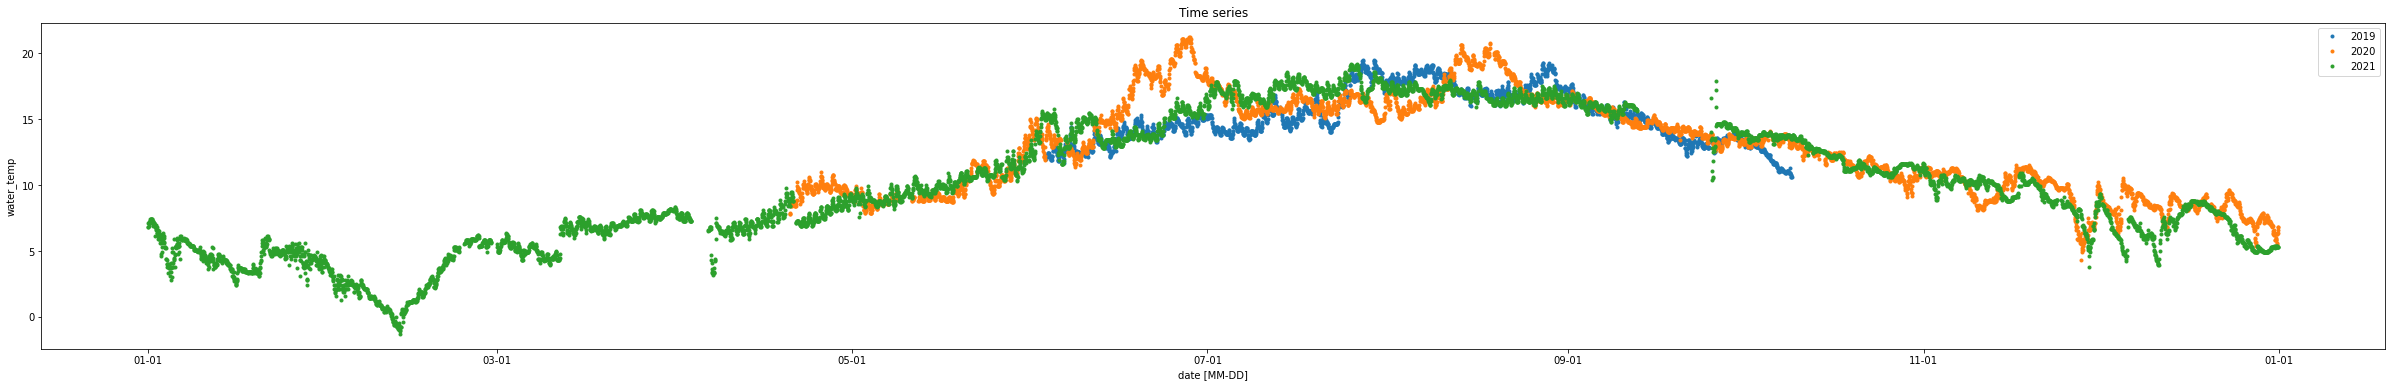

In [9]:
plot_timeseries_all_years("water_temp")

Evaluation of NorKyst

Text(0.5, 1.0, 'Grey: big mismatch, Green: good calibration')

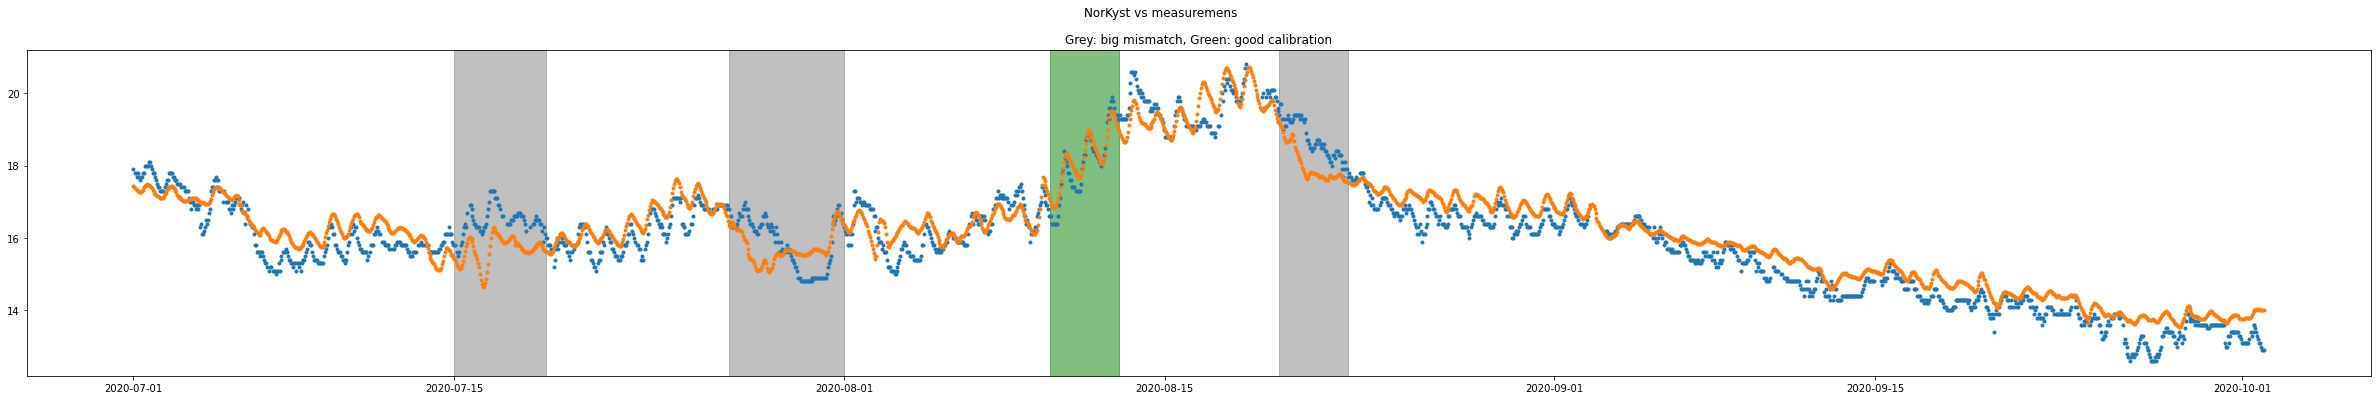

In [25]:
fig, ax = plt.subplots(1,1,figsize=(42,6))
fig.suptitle("NorKyst vs measuremens")
ax.plot(original_data["2020-07-01":"2020-10-01"]["water_temp"].dropna().index, original_data["2020-07-01":"2020-10-01"]["water_temp"].dropna(), marker=".", ls="")
ax.plot(original_data["2020-07-01":"2020-10-01"]["norkyst_water_temp"].dropna().index, original_data["2020-07-01":"2020-10-01"]["norkyst_water_temp"].dropna(), marker=".", ls="")
ax.axvspan("2020-07-15", "2020-07-19", alpha=0.5, color='grey')
ax.axvspan("2020-07-27", "2020-08-01", alpha=0.5, color='grey')
ax.axvspan("2020-08-19", "2020-08-23", alpha=0.5, color='grey')
ax.axvspan("2020-08-10", "2020-08-13", alpha=0.5, color='green')
ax.set_title("Grey: big mismatch, Green: good calibration")

In [17]:
def plot_timeseries_period(start, end):
    """Plotting timeseries of all param in data 
    for some period between start and end"""
    params = data.columns
    
    fig, ax = plt.subplots(figsize=(42,12))
    for param in params:
        print(param)
        scale = 1.0
        offset = 0.0
        try: 
            if param.startswith("air_temperature"):
                offset = -273.15
            if "flux" in param:
                scale = 1e5
            if "fraction" in param:
                scale = 1/10
            if "direction" in param:
                scale = 10
            ax.plot(data[start:end][param].dropna().index, data[start:end][param].dropna()/scale+offset, 
                marker=".", ms=10 + 5*("water_temp" in param), lw=1 + 2.5*("water_temp" in param))
        except:
            pass

    plt.legend(params)
    plt.xlabel("date [MM-DD HH]")
    plt.title("Time series")

water_temp
norkyst_water_temp
air_temperature_2m
wind_speed_10m
wind_direction_10m
cloud_area_fraction
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time


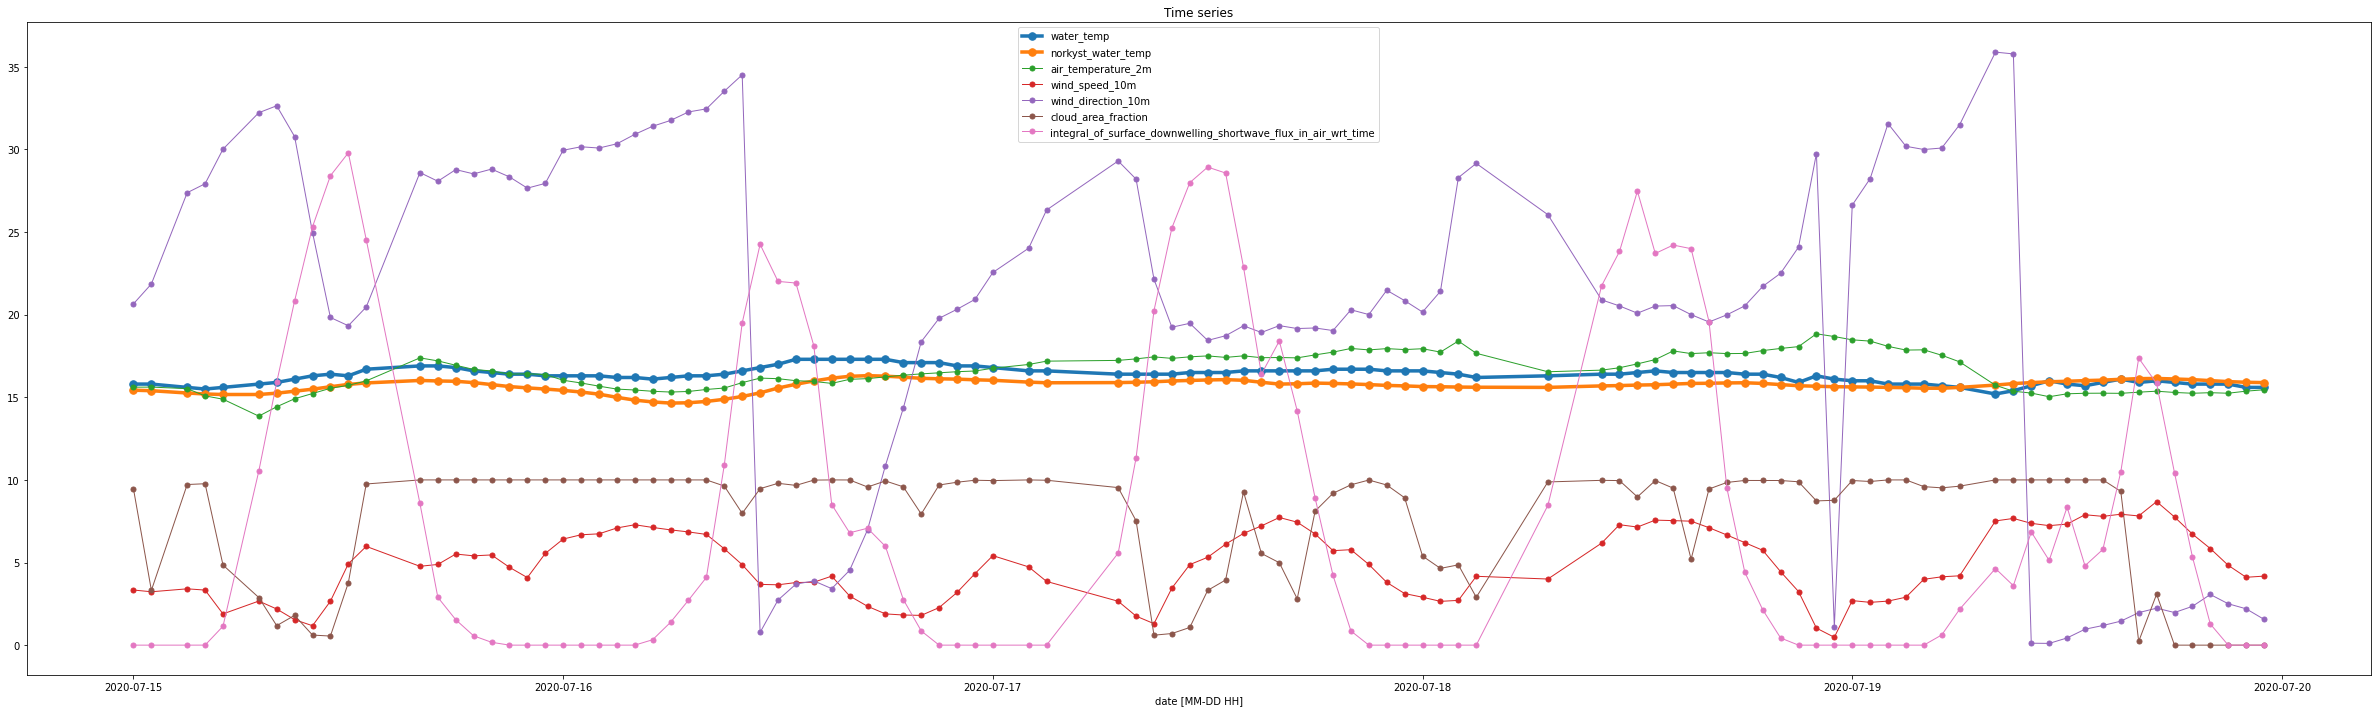

In [18]:
plot_timeseries_period("2020-07-15","2020-07-19")

water_temp
norkyst_water_temp
air_temperature_2m
wind_speed_10m
wind_direction_10m
cloud_area_fraction
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time


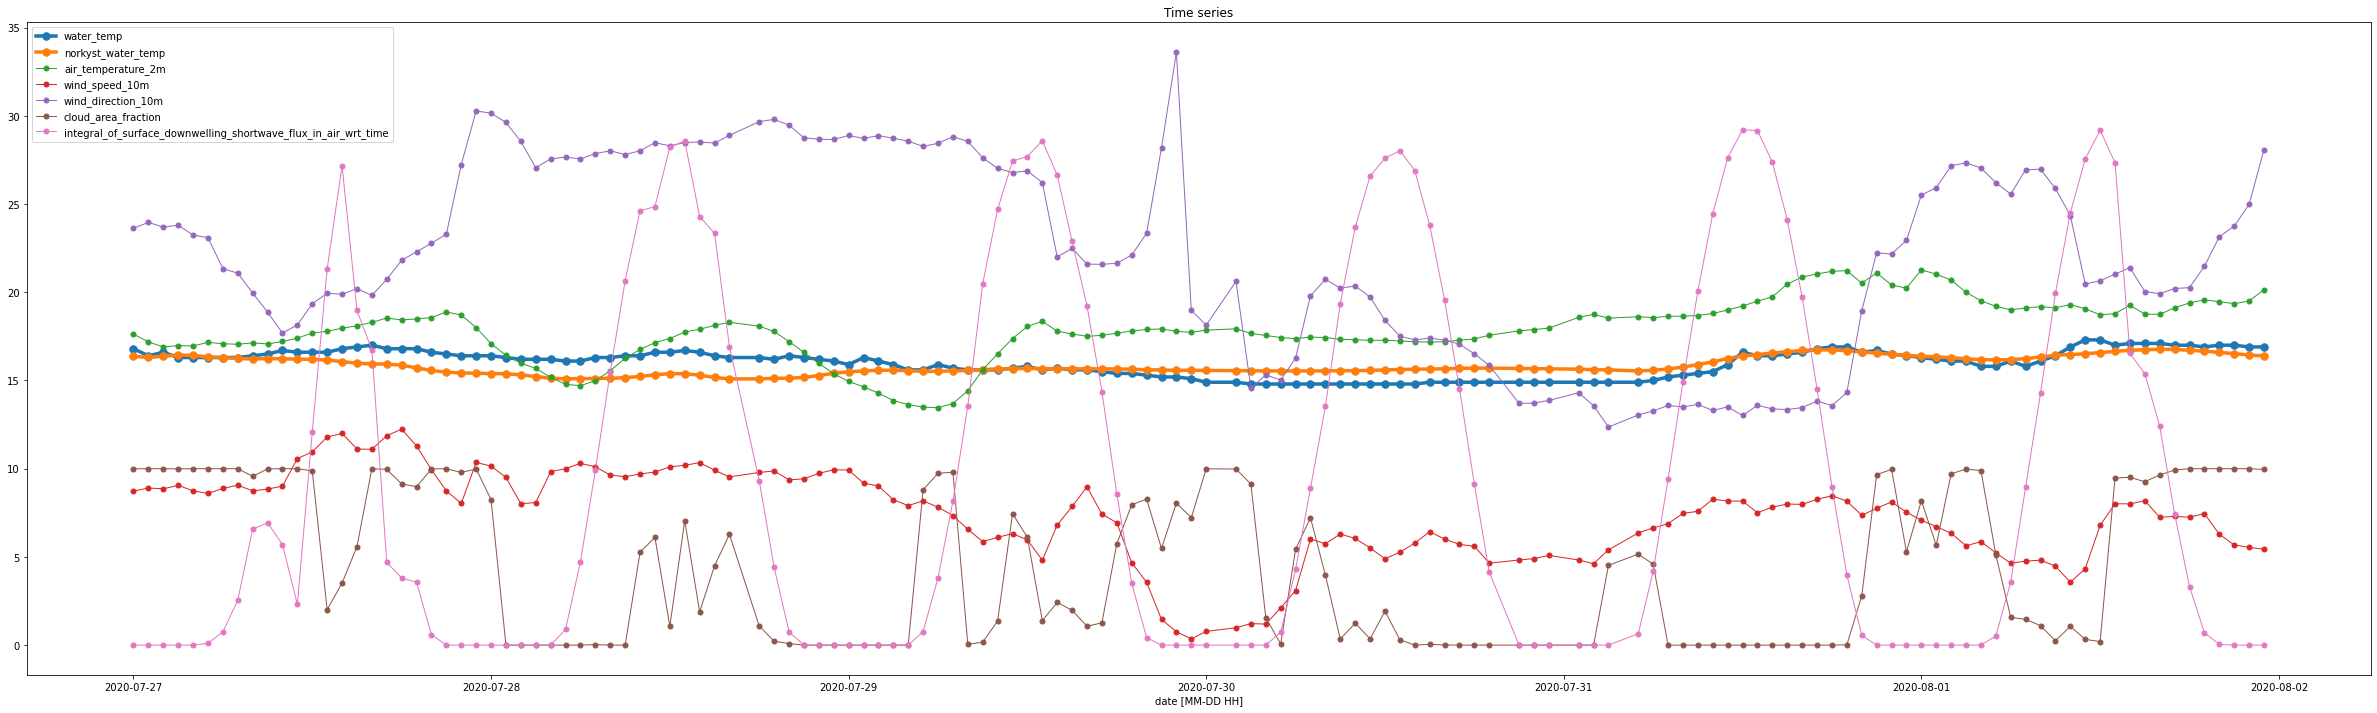

In [22]:
plot_timeseries_period("2020-07-27", "2020-08-01")

water_temp
norkyst_water_temp
air_temperature_2m
wind_speed_10m
wind_direction_10m
cloud_area_fraction
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time


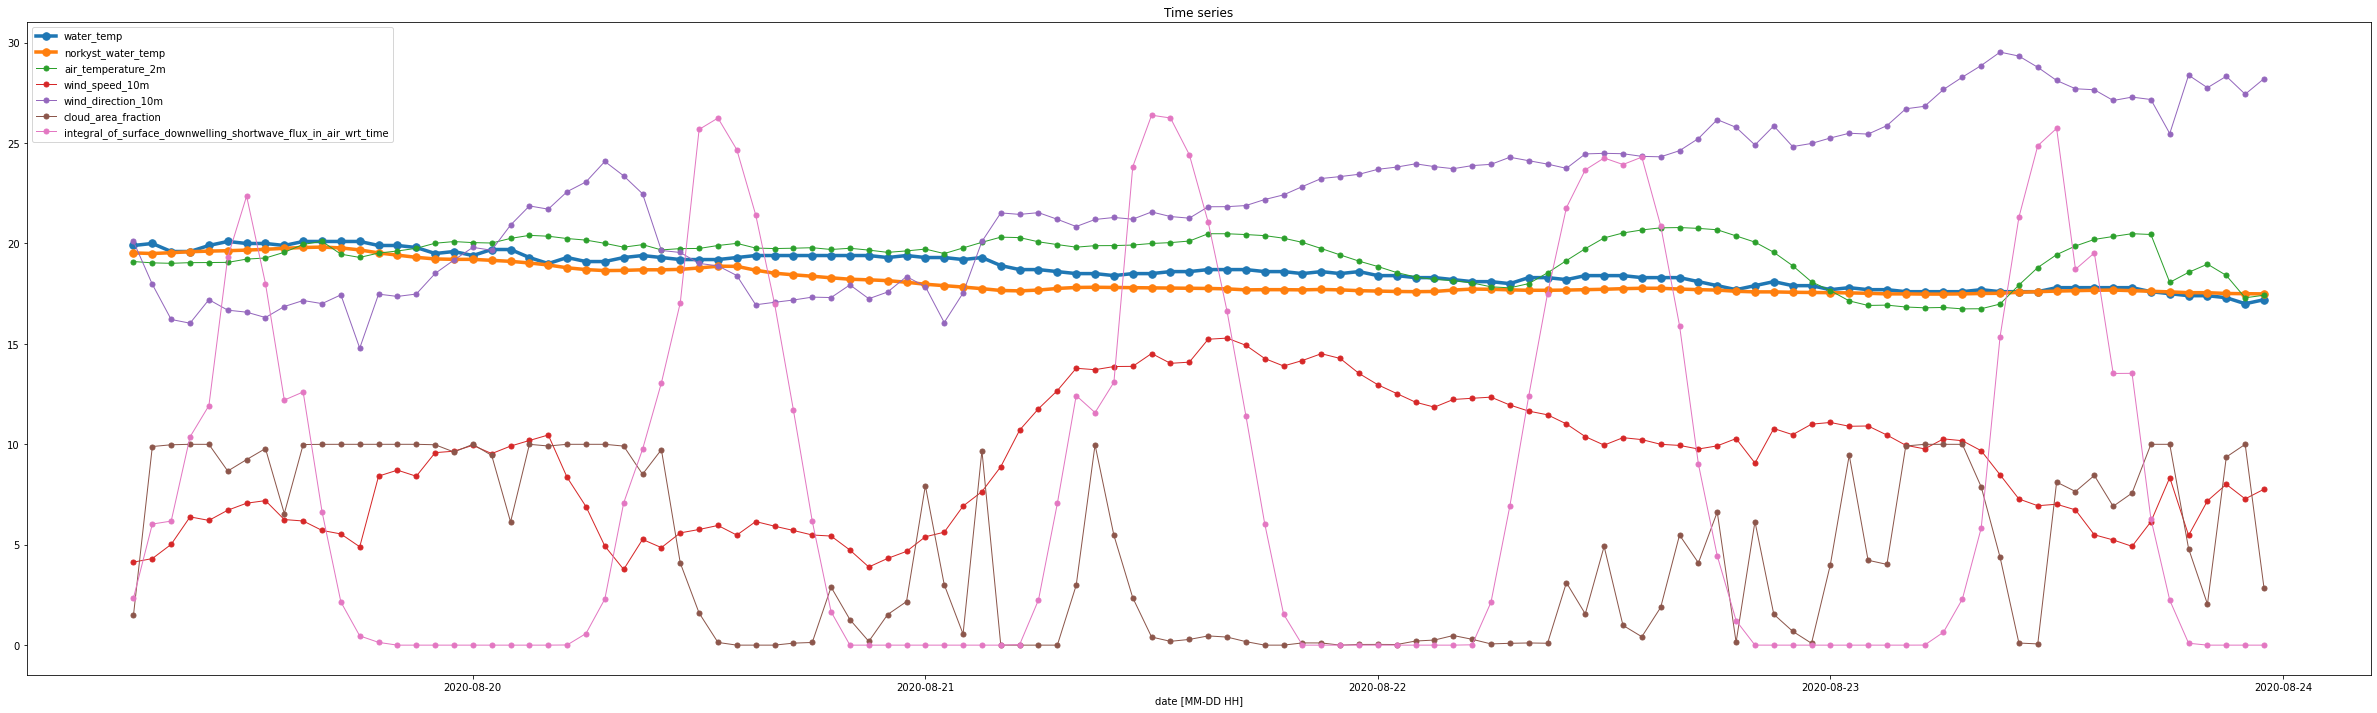

In [26]:
plot_timeseries_period("2020-08-19", "2020-08-23")

water_temp
norkyst_water_temp
air_temperature_2m
wind_speed_10m
wind_direction_10m
cloud_area_fraction
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time


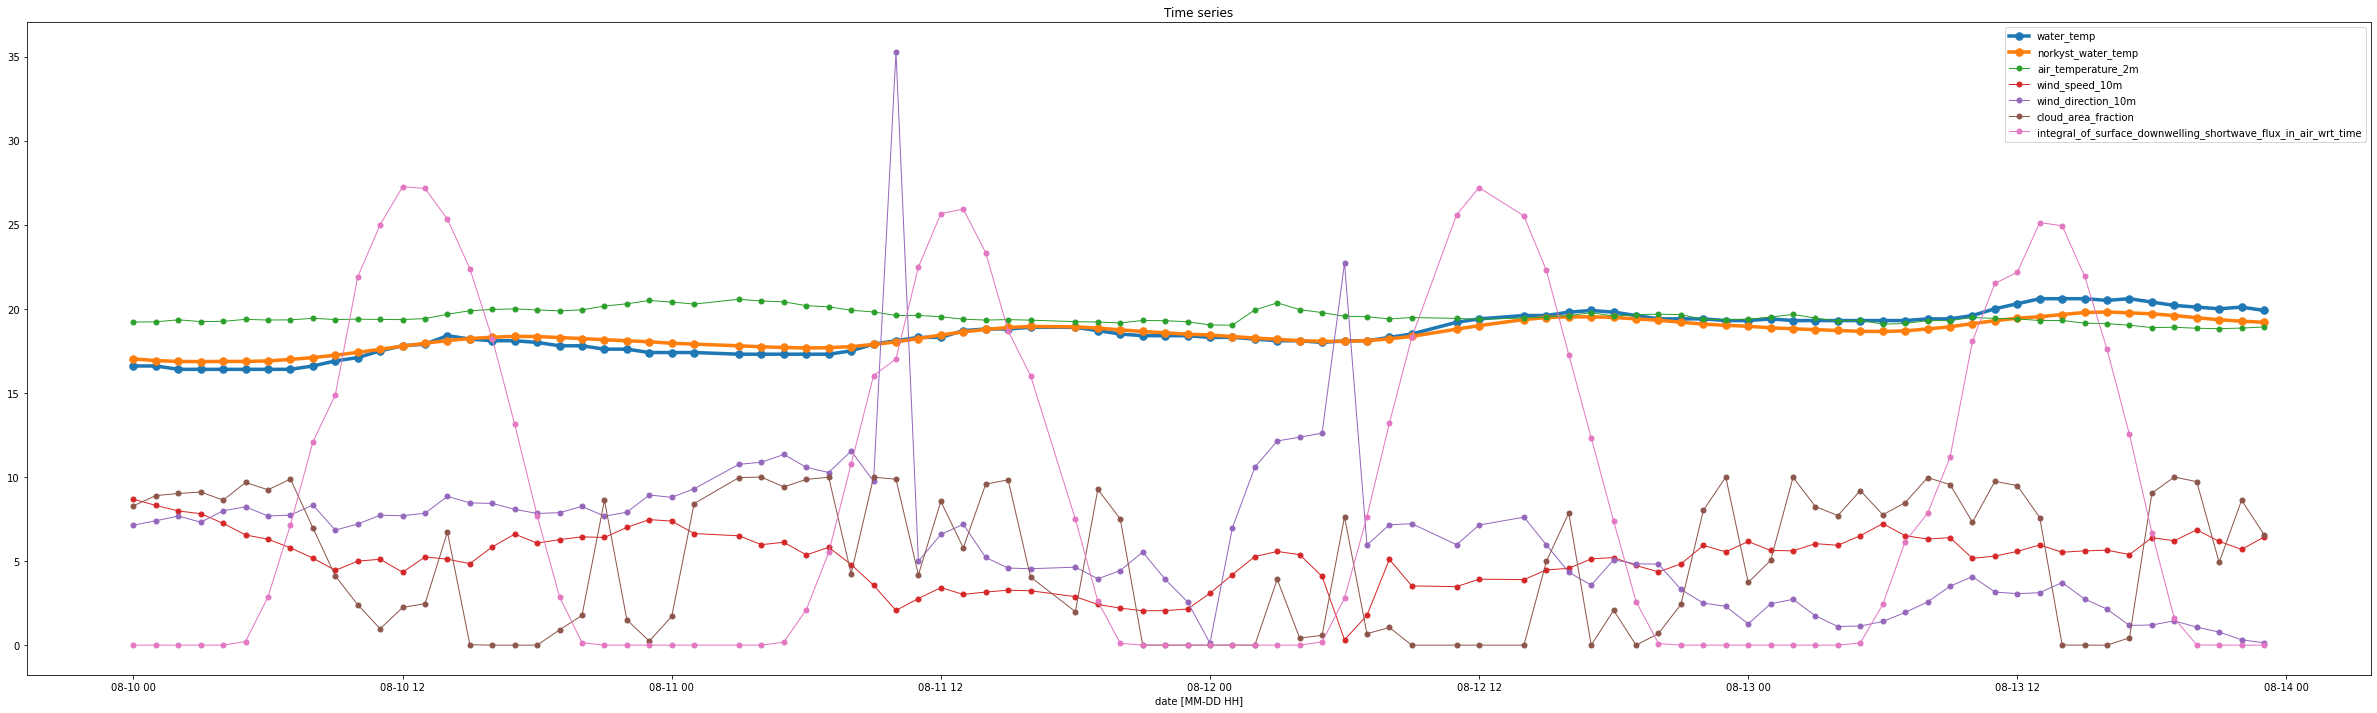

In [24]:
plot_timeseries_period("2020-08-10", "2020-08-13")

## Data Analysis

Learning a data-driven predictor

In [14]:
def plot_test_vs_truth(prediction, test):
    """Plotting timeseries of the prediciton against the truth"""
    height = 6
    width_scale = 7
    fig = plt.figure(figsize=((width_scale+1)*height,height))
    gs = fig.add_gridspec(1, (width_scale+1))
    axs = [fig.add_subplot(gs[1:-1]), fig.add_subplot(gs[-1])]
    # Time series plot
    axs[0].plot(test["water_temp"].index, test["water_temp"], marker=".")
    axs[0].plot(test["water_temp"].index, prediction, marker=".")


    axs[0].legend(["truth","prediction"])
    axs[0].set_xlabel("date")
    axs[0].set_ylabel("water_temp [degC]")
    axs[0].set_title("True time series vs predicted on test set")
    axs[0].tick_params(axis='x', rotation=45)

    # Bias plot
    axs[1].plot(prediction, test["water_temp"], "+")
    axs[1].plot(np.linspace(8,24), np.linspace(8,24))

    axs[1].set_xlabel("predicted water_temp [degC]")
    axs[1].set_ylabel("true water_temp [degC]")
    axs[1].set_title("Predicted test vs true test")    


### Naive Prediction

The naive prediction assumes that the `water_temp` does not change

In [15]:
prediction = original_data["water_temp"].shift(1)[start_test:end_test].dropna()
prediction = prediction.loc[np.isin(prediction.index,test.index)]

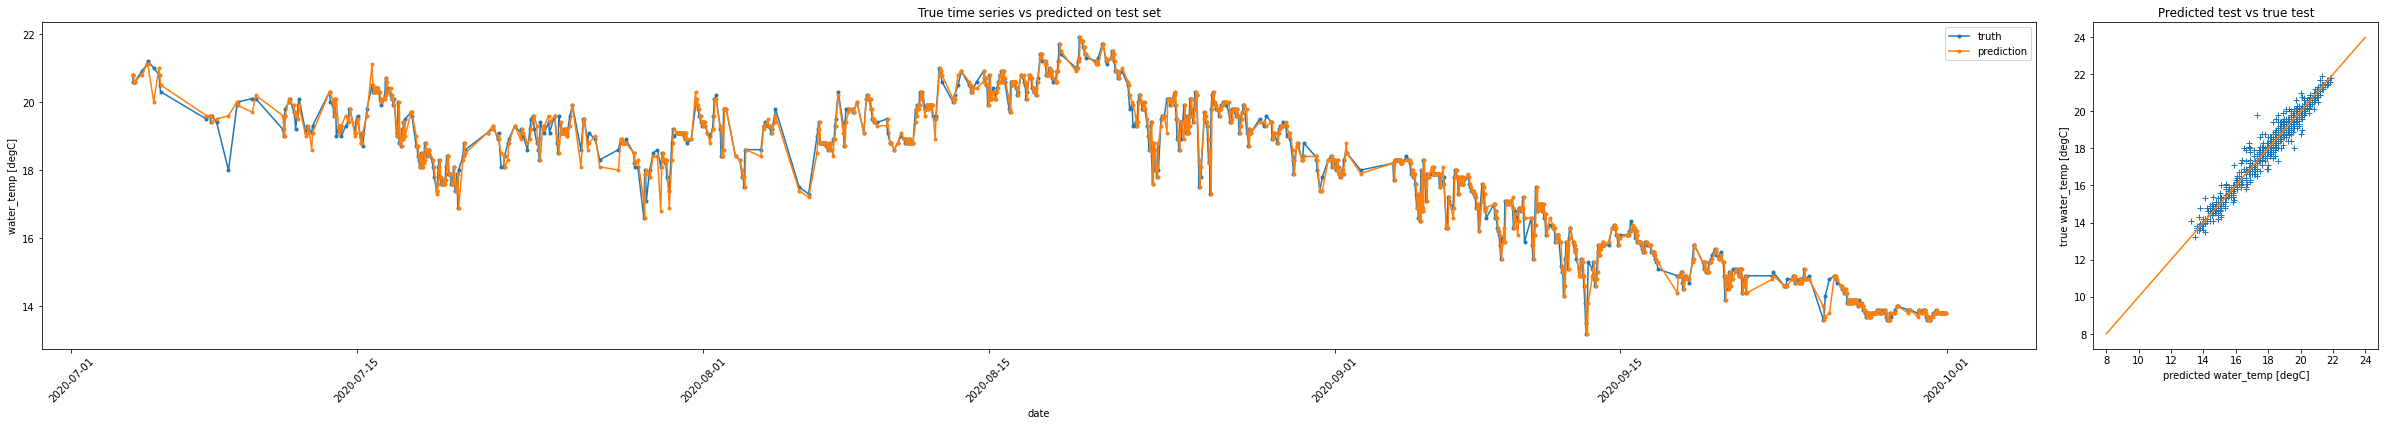

In [16]:
plot_test_vs_truth(prediction, test.loc[np.isin(test.index, prediction.index)])

### NorKyst800 Prediction

Relying on NorKyst800 Forecast without further data analysis


In [17]:
prediction = test["norkyst_water_temp"]

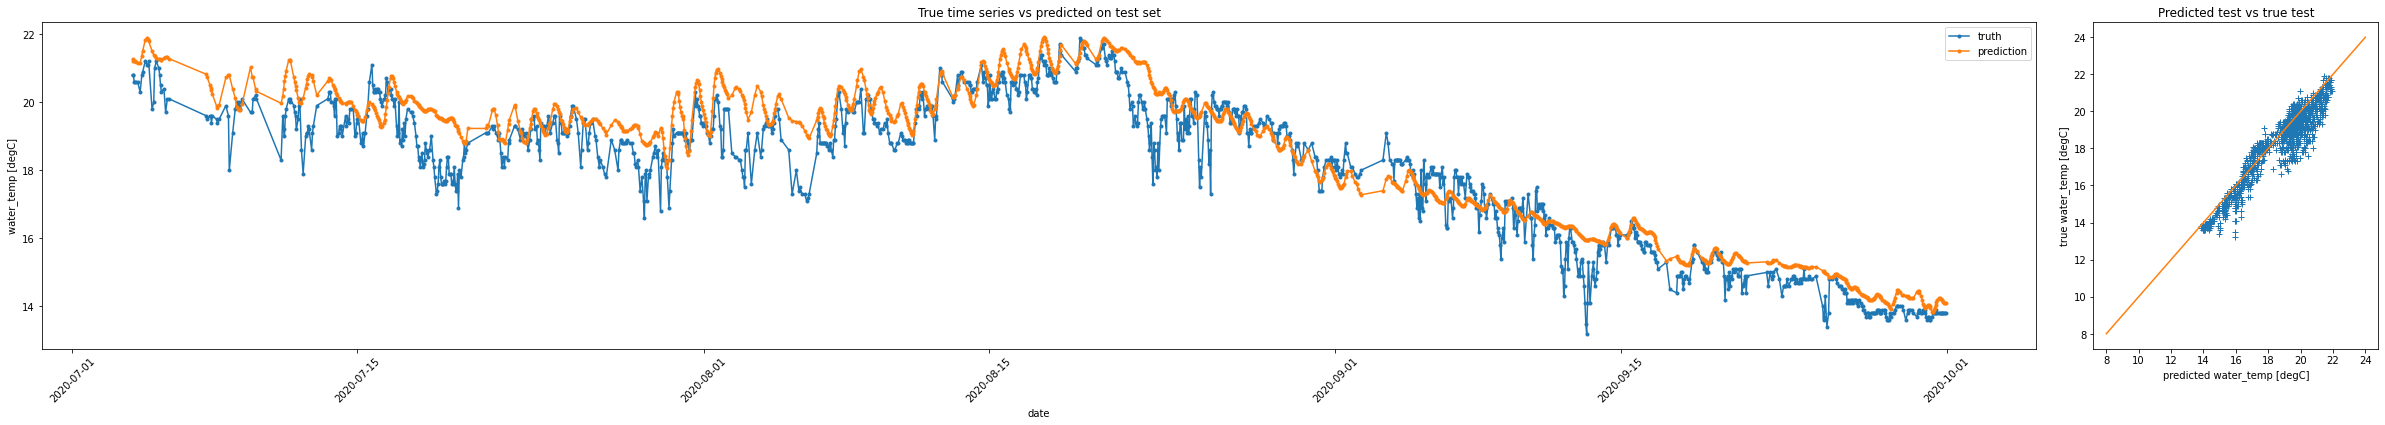

In [18]:
plot_test_vs_truth(prediction, test)

### Regressoion-Type Algorithms

The atmospheric observations at time $t$ and the NorKyst800 forecast for time $t$ are used as covariates in order to model the `water_temp` at time $t$ as response.

NOTE: 
- we use atmospheric forecast values for $t$, but also older information may be of interest!

In [19]:
# Covariates and response
X = train.loc[:, data.columns!="water_temp"]
Y = train["water_temp"]

#### Linear Regression


In [20]:
from sklearn.linear_model import LinearRegression

# Train linear regression model
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression()

In [21]:
# Test model
prediction_labels = linreg.predict(test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = test.index
prediction = prediction.set_index("time")

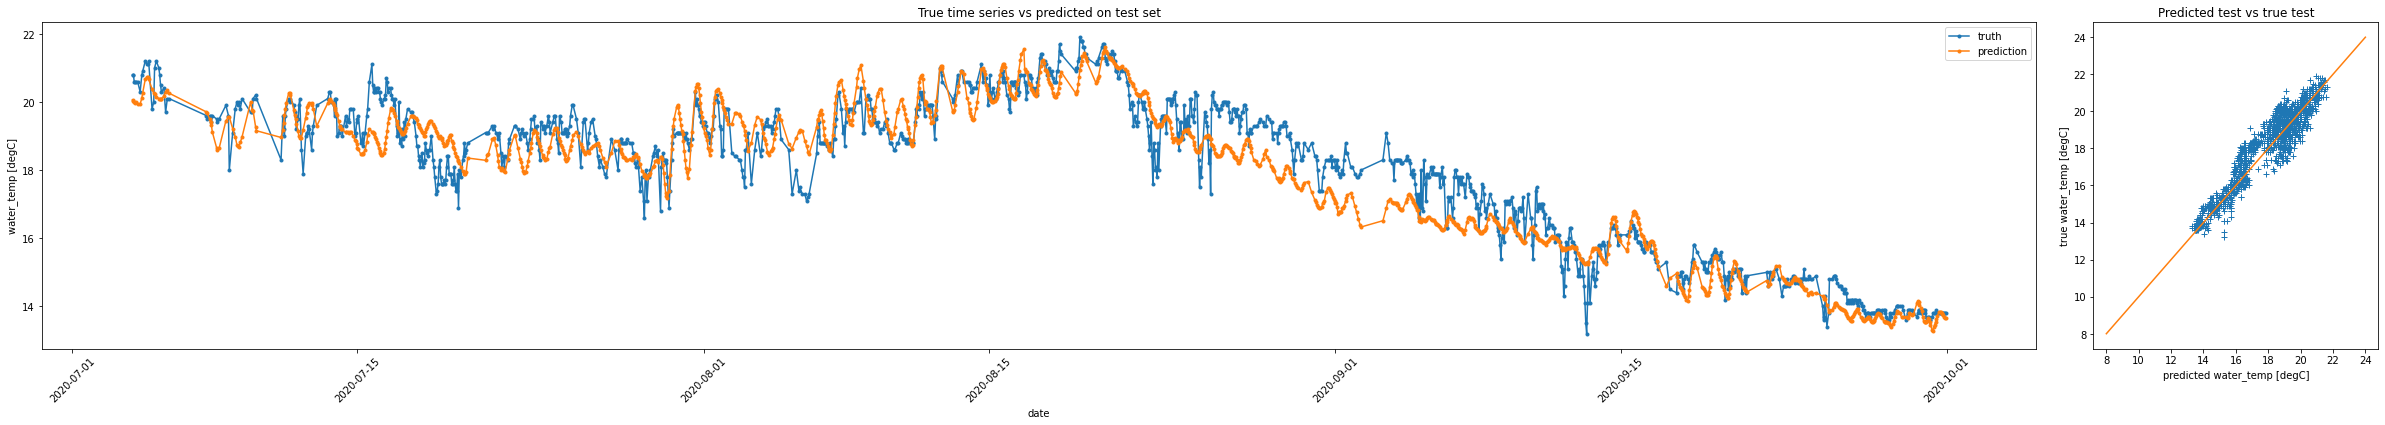

In [22]:
plot_test_vs_truth(prediction, test)

Analysing the regression coefficients 

In [23]:
df_importance = pd.concat([pd.DataFrame(np.transpose(linreg.coef_), columns=["coeff"]), pd.DataFrame(X.columns, columns=["covariate"])], axis = 1).sort_values("coeff", ascending=False, ignore_index=True).set_index("covariate")
df_importance

,coeff
covariate,
norkyst_water_temp,9.046357e-01
air_temperature_2m,8.357633e-02
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time,-7.706841e-09
wind_speed_10m,-1.832541e-02
cloud_area_fraction,-6.583181e-02


#### Extended Linear Regression 
Extending the covariate space by the previous water tempertaure

In [24]:
data_extended = original_data
for col in data.columns:
    data_extended[col+"_old"] = data_extended[col].shift(1)
data_extended = data_extended.dropna() # remove when no old data exist

### TEMP
#data_extended.drop('water_temp_old', inplace=True, axis=1) 


train_extended = data_extended[start_train : end_train]
test_extended  = data_extended[start_test  : end_test ]

# Covariates and response
X_extended = train_extended.loc[:, data_extended.columns!="water_temp"]
Y_extended = train_extended["water_temp"]


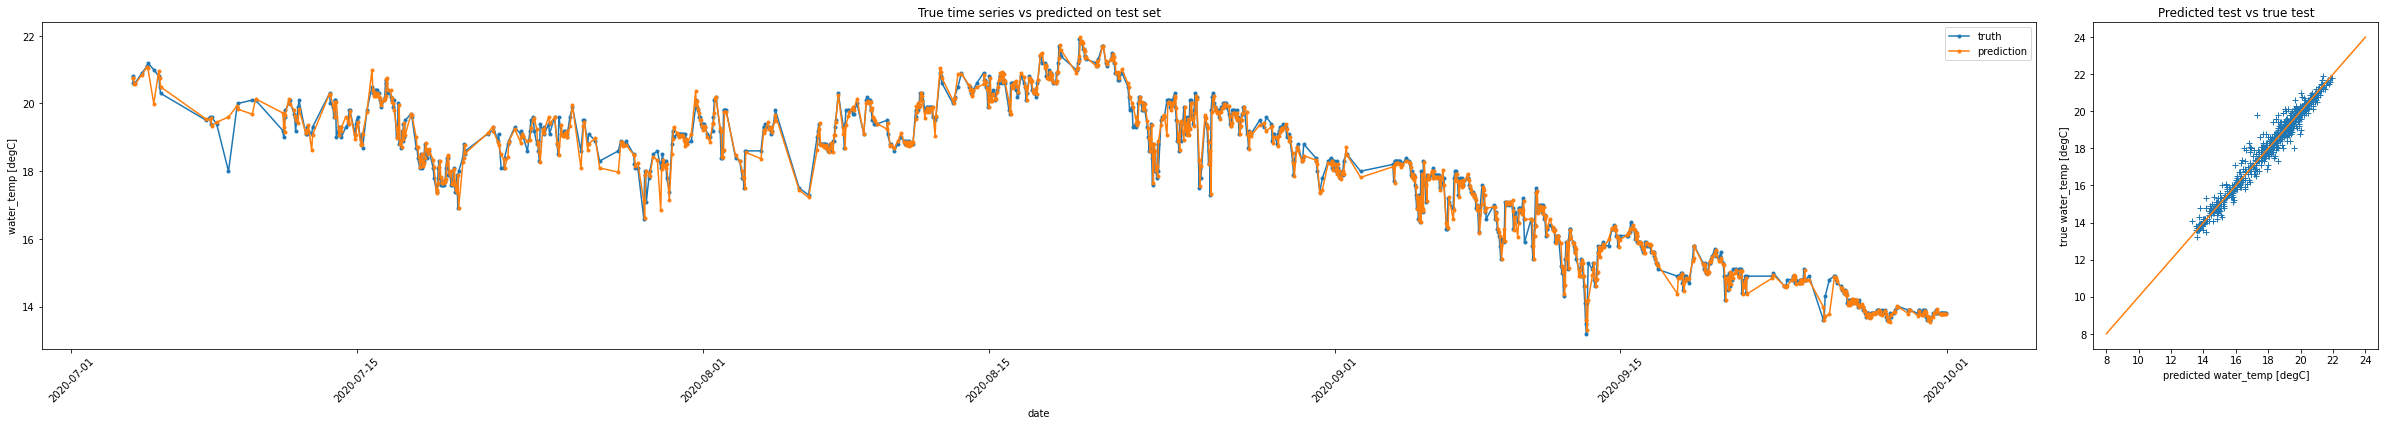

In [25]:
# Train linear regression model
linreg_extended = LinearRegression()
linreg_extended.fit(X_extended,Y_extended)

# Test model
prediction_labels_extended = linreg_extended.predict(test_extended.loc[:, data_extended.columns!="water_temp"])
prediction_extended = pd.DataFrame(prediction_labels_extended)
prediction_extended["time"] = test_extended.index
prediction_extended = prediction_extended.set_index("time")

plot_test_vs_truth(prediction_extended, test_extended)

In [26]:
df_importance = pd.concat([pd.DataFrame(np.transpose(linreg_extended.coef_), columns=["coeff"]), pd.DataFrame(X_extended.columns, columns=["covariate"])], axis = 1).sort_values("coeff", ascending=False, ignore_index=True).set_index("covariate")
df_importance

,coeff
covariate,
water_temp_old,9.590190e-01
norkyst_water_temp,4.956632e-01
air_temperature_2m,1.214625e-02
cloud_area_fraction_old,7.232666e-03
wind_speed_10m,4.502685e-03
cloud_area_fraction,9.208590e-04
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time,5.287865e-08
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time_old,-4.359994e-08
wind_speed_10m_old,-5.895631e-03


#### PCA 

In [27]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# from sklearn.decomposition import PCA

# pca = PCA(n_components="mle")

# pcs = pca.fit(X_scaled, Y)

# prediction = pca.transform(test.loc[:,test.columns!="water_temp"])

#### Random Forest

We use all default settings (`n_ensembles` aka the number of trees = 100, `max_features` aka the number of features to split on = sqrt(n_features))

In [28]:
from sklearn.ensemble import RandomForestRegressor
# train model
rf = RandomForestRegressor()
rf.fit(X,Y)

RandomForestRegressor()

In [29]:
# Test model
prediction_labels = rf.predict(test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = test.index
prediction = prediction.set_index("time")

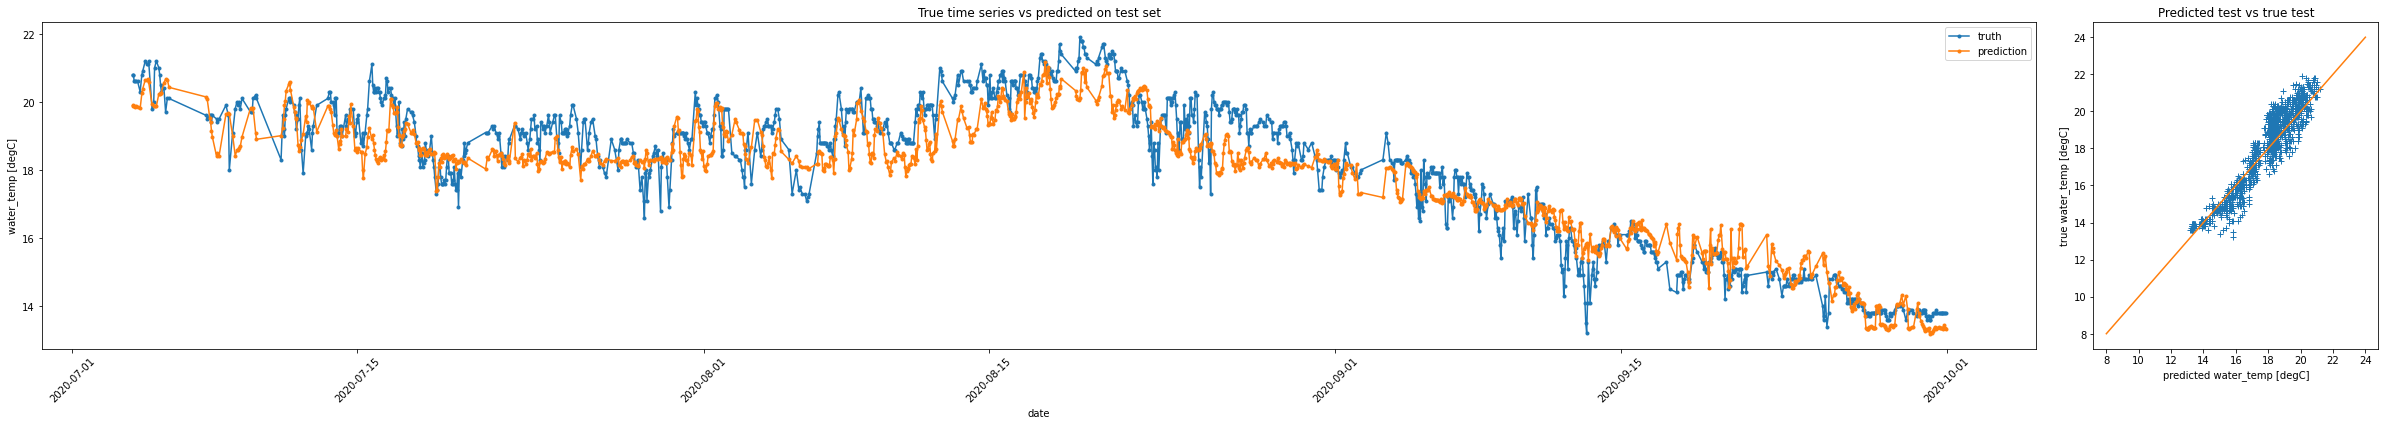

In [30]:
plot_test_vs_truth(prediction, test)

In [31]:
importance_values = rf.feature_importances_
importance = pd.DataFrame(importance_values, columns=["importance"])
importance["element"] = X.columns
importance = importance.set_index("element")
importance = importance.sort_values(by="importance", ascending=False)
importance

,importance
element,
norkyst_water_temp,0.985996
air_temperature_2m,0.006718
wind_speed_10m,0.004177
cloud_area_fraction,0.001751
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time,0.001357


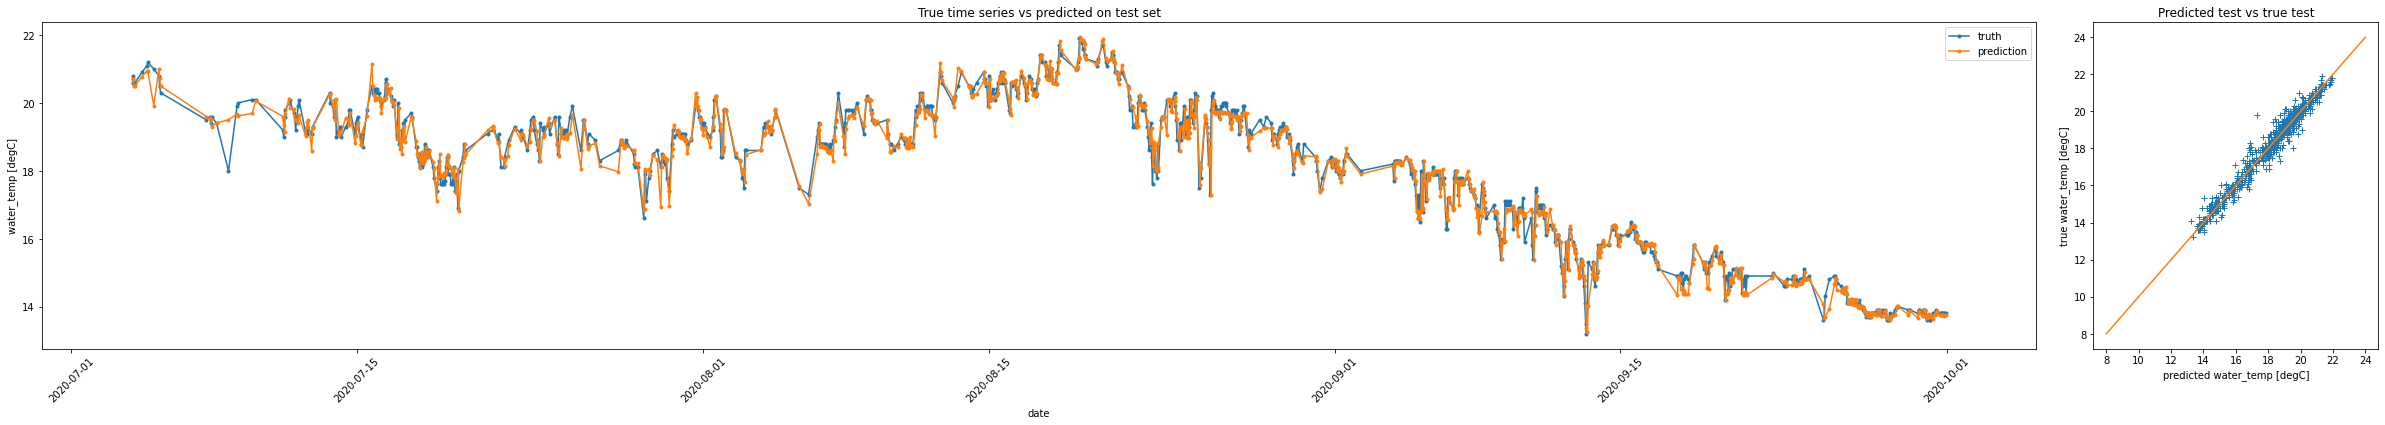

In [32]:
rf_extended = RandomForestRegressor()
rf_extended.fit(X_extended,Y_extended)

# Test model
prediction_labels_extended = rf_extended.predict(test_extended.loc[:, data_extended.columns!="water_temp"])
prediction_extended = pd.DataFrame(prediction_labels_extended)
prediction_extended["time"] = test_extended.index
prediction_extended = prediction_extended.set_index("time")

plot_test_vs_truth(prediction_extended, test_extended)

#### XGBoost

Using only default, however parameter tuning would be important for boosting though.


In [33]:
from xgboost import XGBRegressor
# train model
xgb = XGBRegressor()
xgb.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# Test model
prediction_labels = xgb.predict(test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = test.index
prediction = prediction.set_index("time")

/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


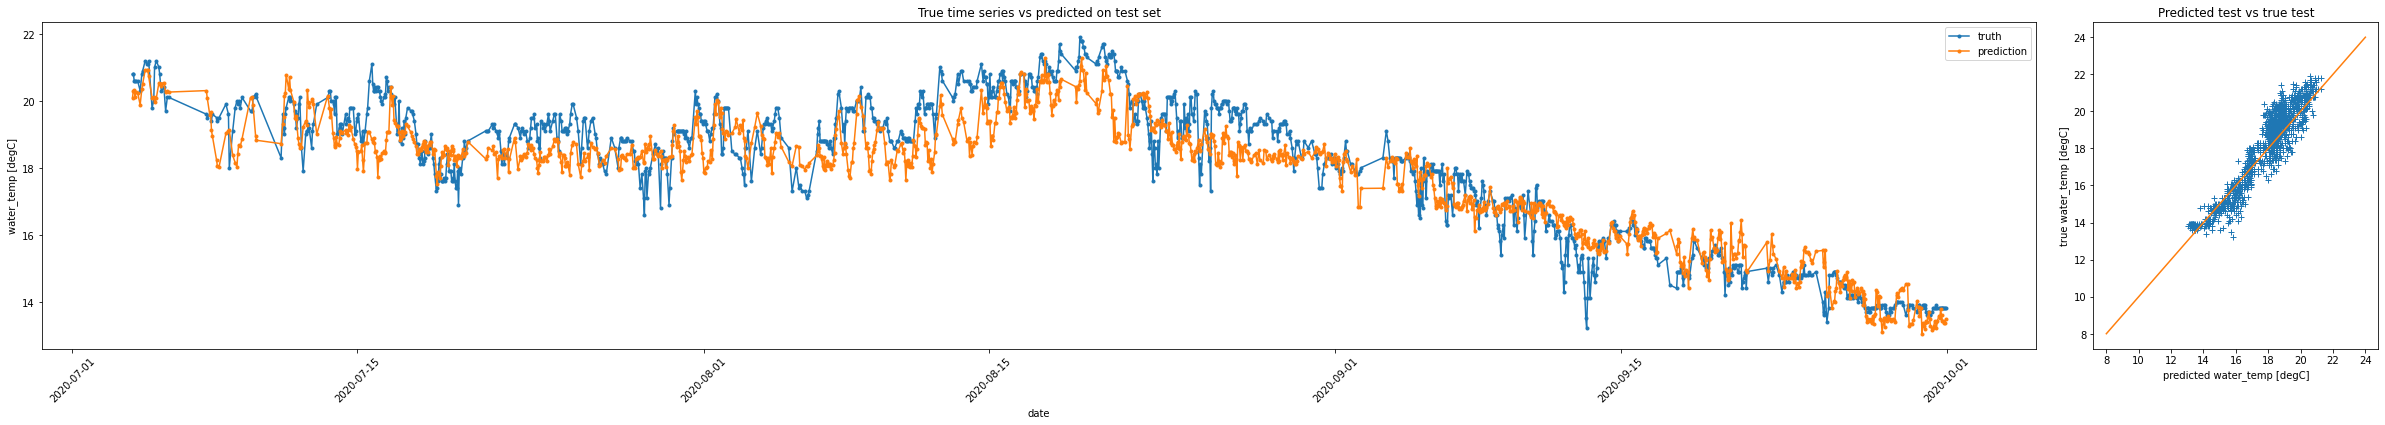

In [35]:
plot_test_vs_truth(prediction, test)

/home/florianb/miniconda3/envs/datadriven/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


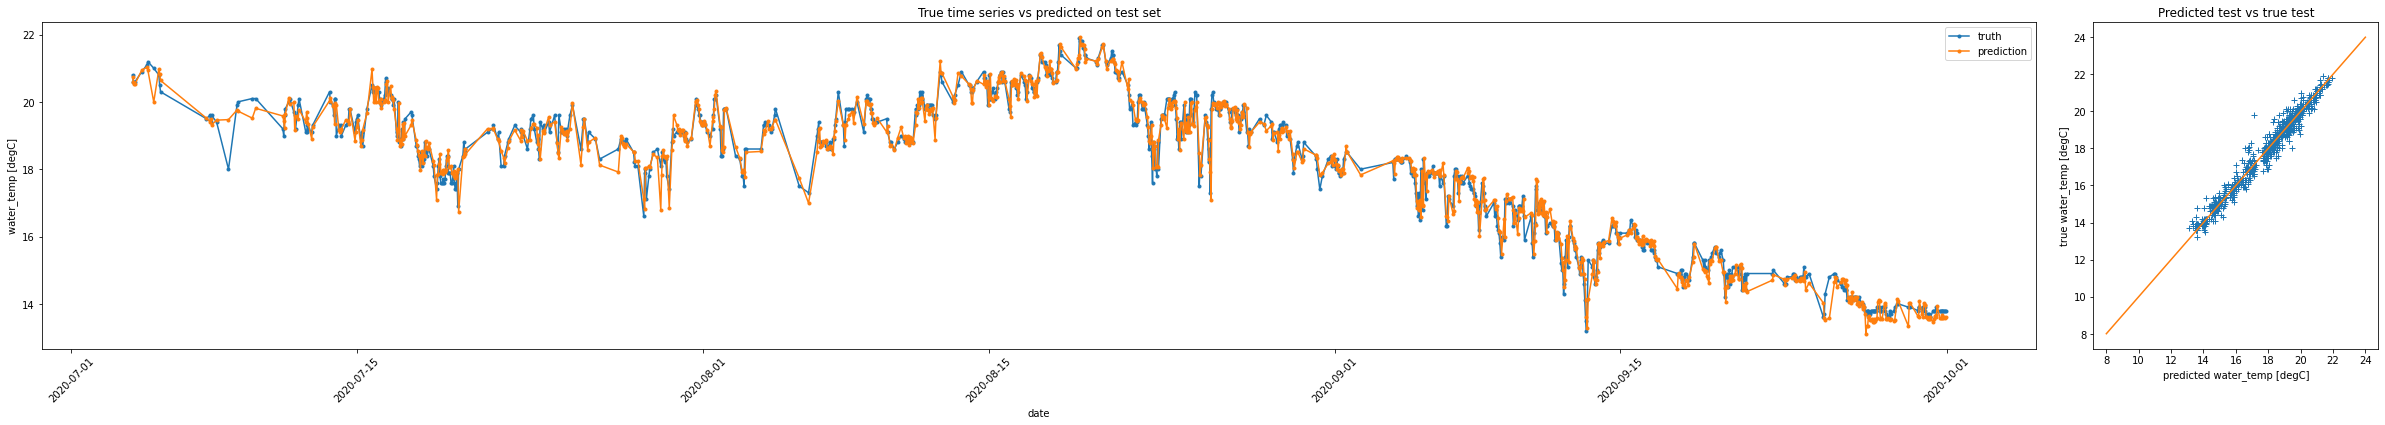

In [36]:
# train model
xgb_extended = XGBRegressor()
xgb_extended.fit(X_extended,Y_extended)

# Test model
prediction_labels_extended = xgb_extended.predict(test_extended.loc[:, data_extended.columns!="water_temp"])
prediction_extended = pd.DataFrame(prediction_labels_extended)
prediction_extended["time"] = test_extended.index
prediction_extended = prediction_extended.set_index("time")

plot_test_vs_truth(prediction_extended, test_extended)

### Neural Nets

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# NOTE: without a normalizer the results are shifted
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X))

# Building the neural net
# NOTE: The design of the net has major influence on the results!
# For details see documentation of tensorflow
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(5),
    layers.Dense(units=1)
])

# Configuring with loss function and optimization algorithm
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Training
# NOTE: The training results are very random such that the results from every run are fundamentally different
model.fit(X, Y,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [38]:
#test
prediction_labels = model.predict(test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = test.index
prediction = prediction.set_index("time")

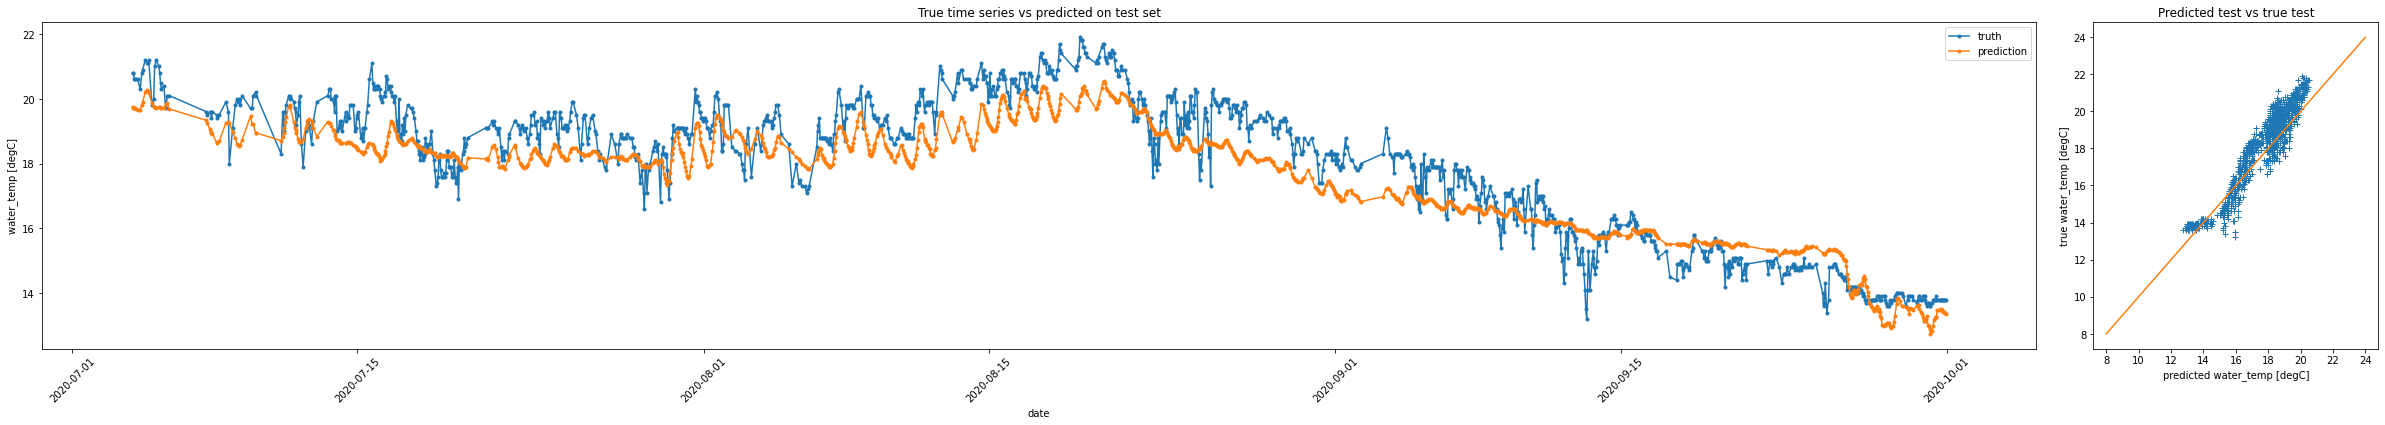

In [39]:
plot_test_vs_truth(prediction, test)

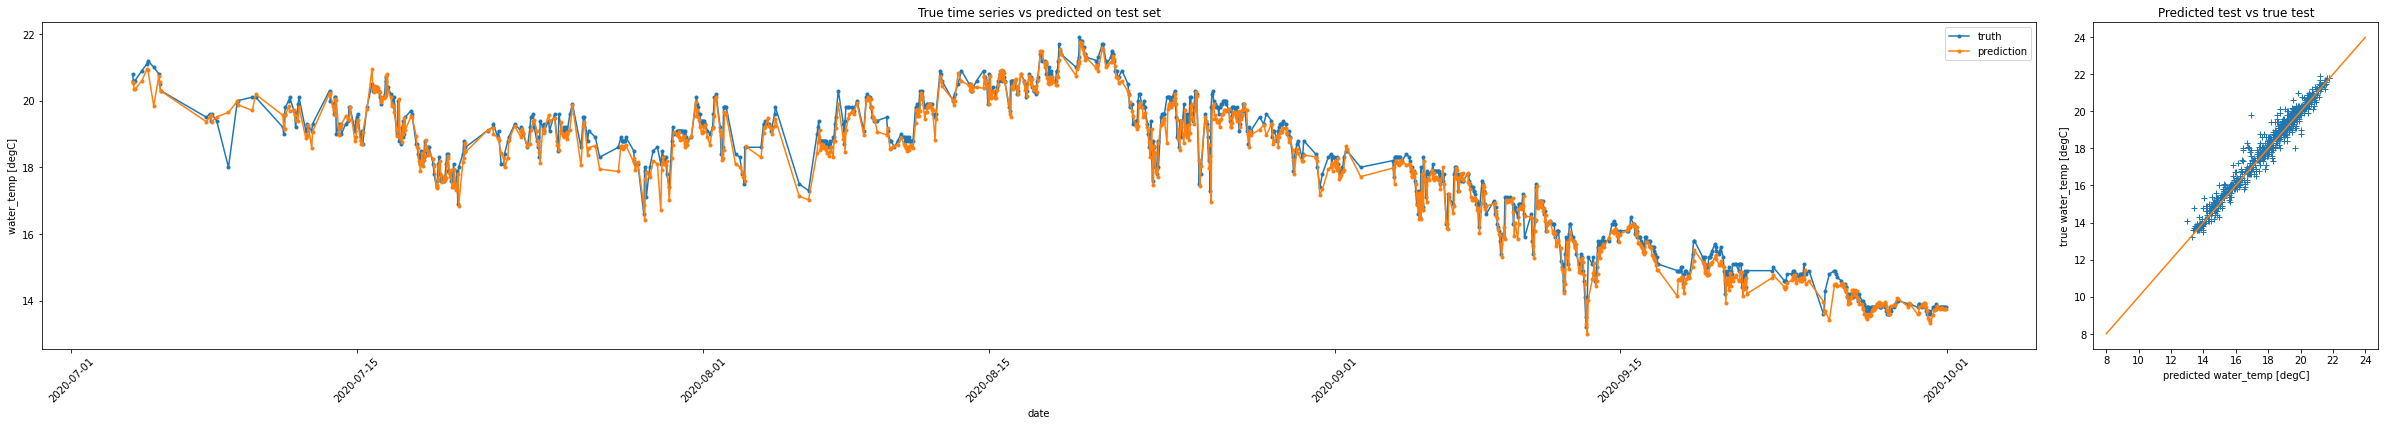

In [40]:
# NOTE: without a normalizer the results are shifted
normalizer_extended = preprocessing.Normalization()
normalizer_extended.adapt(np.array(X_extended))

# Building the neural net
# NOTE: The design of the net has major influence on the results!
# For details see documentation of tensorflow
model_extended = tf.keras.Sequential([
    normalizer_extended,
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(5),
    layers.Dense(units=1)
])

# Configuring with loss function and optimization algorithm
model_extended.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Training
# NOTE: The training results are very random such that the results from every run are fundamentally different
model_extended.fit(X_extended, Y_extended,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

#test
prediction_labels_extended = model_extended.predict(test_extended.loc[:, data_extended.columns!="water_temp"])
prediction_extended = pd.DataFrame(prediction_labels_extended)
prediction_extended["time"] = test_extended.index
prediction_extended = prediction_extended.set_index("time")

plot_test_vs_truth(prediction_extended, test_extended)

### Temporal Fusion Transformer 

https://arxiv.org/pdf/1912.09363.pdf

In [41]:
from darts.models import TFTModel

ImportError: cannot import name 'TFTModel' from 'darts.models' (unknown location)